In [48]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [49]:
train = pd.read_csv(r'C:\Users\Rishabh\Downloads\titanic (1)\train.csv')
test = pd.read_csv(r"C:\Users\Rishabh\Downloads\titanic (1)\test.csv")
train.set_index(['PassengerId'],inplace=True)
test.set_index(['PassengerId'],inplace=True)
train.head(10)



,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


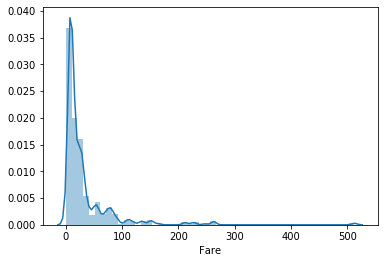

In [50]:
sns.distplot(train['Fare'])
plt.show()


In [51]:
train["Fare"] = train["Fare"].fillna(train["Fare"].median())
train.loc[train["Fare"]<=5,"Fare"]=0
train.loc[(train['Fare'] > 5) & (train['Fare'] <= 10),"Fare"]=1
train.loc[(train['Fare'] > 10) & (train['Fare'] <= 20),"Fare"]=2
train.loc[(train['Fare'] > 20) & (train['Fare'] <= 50),"Fare"]=3
train.loc[(train['Fare'] > 50) & (train['Fare'] <= 100),"Fare"]=4
train.loc[(train['Fare'] > 100) & (train['Fare'] <= 200),"Fare"]=5
train.loc[200<train["Fare"],"Fare"]=10


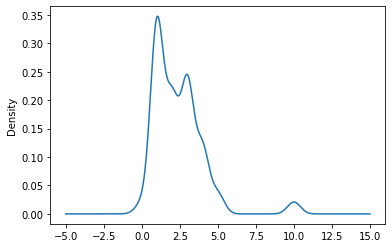

In [52]:
train.Fare.plot(kind="kde")
plt.show()

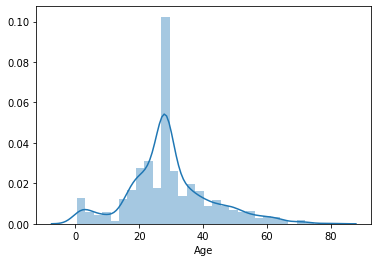

In [53]:
train["Age"] = train["Age"].fillna(train["Age"].median())
sns.distplot(train['Age'])

plt.show()

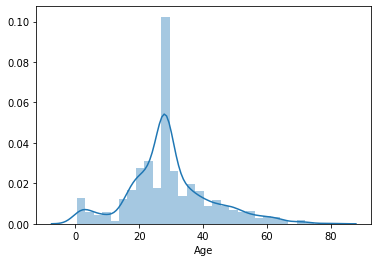

In [54]:
train["Age"] = train["Age"].fillna(train["Age"].median())
sns.distplot(train['Age'])

plt.show()

In [55]:
train.loc[train["Age"]<=5,"Age"]=0
train.loc[(train['Age'] > 5) & (train['Age'] <= 10),"Age"]=1
train.loc[(train['Age'] > 10) & (train['Age'] <= 20),"Age"]=2
train.loc[(train['Age'] > 20) & (train['Age'] <= 30),"Age"]=3
train.loc[(train['Age'] > 30) & (train['Age'] <= 40),"Age"]=4
train.loc[(train['Age'] > 40) & (train['Age'] <= 50),"Age"]=5
train.loc[(train['Age'] > 50) & (train['Age'] <= 60),"Age"]=6
train.loc[(train['Age'] > 60) & (train['Age'] <= 70),"Age"]=7
train.loc[(train['Age'] > 70) & (train['Age'] <= 80),"Age"]=8
train.loc[train["Age"]>80,"Age"]=10


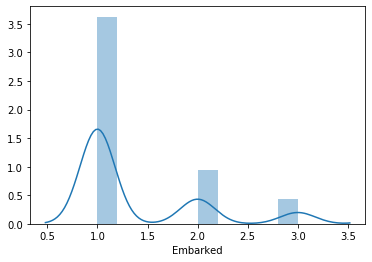

In [56]:
train["Embarked"] = train["Embarked"].fillna('S')
train.loc[train["Embarked"]=='S',"Embarked"]=1
train.loc[train["Embarked"]=='C',"Embarked"]=2
train.loc[train["Embarked"]=='Q',"Embarked"]=3


sns.distplot(train['Embarked'])

plt.show()

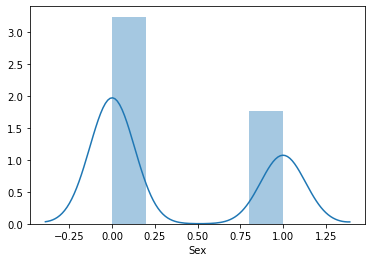

In [57]:
train.loc[train["Sex"]=="male","Sex"]=0
train.loc[train["Sex"]=="female","Sex"]=1

sns.distplot(train['Sex'])

plt.show()

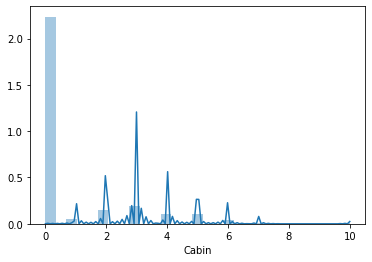

In [58]:
train["Cabin"] = train["Cabin"].fillna('0')
train['Cabin'] = train['Cabin'].str.extract(pat = '([ABCDEFGT0])')
train.loc[train["Cabin"]=='A',"Cabin"]=1
train.loc[train["Cabin"]=='B',"Cabin"]=2
train.loc[train["Cabin"]=='C',"Cabin"]=3
train.loc[train["Cabin"]=='D',"Cabin"]=4
train.loc[train["Cabin"]=='E',"Cabin"]=5
train.loc[train["Cabin"]=='F',"Cabin"]=6
train.loc[train["Cabin"]=='G',"Cabin"]=7
train.loc[train["Cabin"]=='T',"Cabin"]=10
train.loc[train["Cabin"]=='0',"Cabin"]=0

sns.distplot(train['Cabin'])

plt.show()

In [59]:
train = train.drop(['Ticket'], axis=1)
train = train.drop(['Name'], axis=1)
test = test.drop(['Ticket'], axis=1)
test = test.drop(['Name'], axis=1)

In [60]:
test.loc[test["Embarked"]=='S',"Embarked"]=1
test.loc[test["Embarked"]=='C',"Embarked"]=2
test.loc[test["Embarked"]=='Q',"Embarked"]=3

test.loc[test["Sex"]=="male","Sex"]=0
test.loc[test["Sex"]=="female","Sex"]=1



test["Fare"] = test["Fare"].fillna(test["Fare"].median())
test.loc[test["Fare"]<=5,"Fare"]=0
test.loc[(test['Fare'] > 5) & (test['Fare'] <= 10),"Fare"]=1
test.loc[(test['Fare'] > 10) & (test['Fare'] <= 20),"Fare"]=2
test.loc[(test['Fare'] > 20) & (test['Fare'] <= 50),"Fare"]=3
test.loc[(test['Fare'] > 50) & (test['Fare'] <= 100),"Fare"]=4
test.loc[(test['Fare'] > 100) & (test['Fare'] <= 200),"Fare"]=5
test.loc[200<test["Fare"],"Fare"]=10

test["Age"] = test["Age"].fillna(test["Age"].median())

test["Cabin"] = test["Cabin"].fillna('0')
test['Cabin'] = test['Cabin'].str.extract(pat = '([ABCDEFG0T])')
test.loc[test["Cabin"]=='A',"Cabin"]=1
test.loc[test["Cabin"]=='B',"Cabin"]=2
test.loc[test["Cabin"]=='C',"Cabin"]=3
test.loc[test["Cabin"]=='D',"Cabin"]=4
test.loc[test["Cabin"]=='E',"Cabin"]=5
test.loc[test["Cabin"]=='F',"Cabin"]=6
test.loc[test["Cabin"]=='G',"Cabin"]=7
test.loc[test["Cabin"]=='T',"Cabin"]=10

test.loc[test["Age"]<=5,"Age"]=0
test.loc[(test['Age'] > 5) & (test['Age'] <= 10),"Age"]=1
test.loc[(test['Age'] > 10) & (test['Age'] <= 20),"Age"]=2
test.loc[(test['Age'] > 20) & (test['Age'] <= 30),"Age"]=3
test.loc[(test['Age'] > 30) & (test['Age'] <= 40),"Age"]=4
test.loc[(test['Age'] > 40) & (test['Age'] <= 50),"Age"]=5
test.loc[(test['Age'] > 50) & (test['Age'] <= 60),"Age"]=6
test.loc[(test['Age'] > 60) & (test['Age'] <= 70),"Age"]=7
test.loc[(test['Age'] > 70) & (test['Age'] <= 80),"Age"]=8
test.loc[80<test["Age"],"Age"]=10


print(test.head())

             Pclass  Sex  Age  SibSp  Parch  Fare Cabin  Embarked
PassengerId                                                      
892               3    0  4.0      0      0   1.0     0         3
893               3    1  5.0      1      0   1.0     0         1
894               2    0  7.0      0      0   1.0     0         3
895               3    0  3.0      0      0   1.0     0         1
896               3    1  3.0      1      1   2.0     0         1


In [61]:
for i in [train, test]:
        i['Fam_Size'] = np.where((i['SibSp']+i['Parch']) == 0 , 1,
                            np.where((i['SibSp']+i['Parch']) <= 3,2, 3))
        del i['SibSp']
        del i['Parch']
print(train.head())

             Survived  Pclass  Sex  Age  Fare  Cabin  Embarked  Fam_Size
PassengerId                                                             
1                   0       3    0  3.0   1.0      0         1         2
2                   1       1    1  4.0   4.0      3         2         2
3                   1       3    1  3.0   1.0      0         1         1
4                   1       1    1  4.0   4.0      3         1         2
5                   0       3    0  4.0   1.0      0         1         1


In [62]:
x=train.iloc[:,1:9]
y=train.iloc[:,0]
test_features = test.iloc[:,:]

0.8114478114478114


Text(0.5, 1.05, 'Confusion_matrix for Linear')

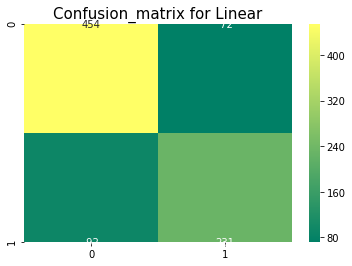

In [63]:
classifier=linear_model.LogisticRegression()
classifier1= classifier.fit(x,y)
y_pred = cross_val_predict(classifier,X_train,y_train,cv=10)
print(classifier1.score(x,y))
prediction = classifier1.predict(test_features) 

sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix for Linear', y=1.05, size=15)


0.8327721661054994


Text(0.5, 1.05, 'Confusion_matrix for Logistic')

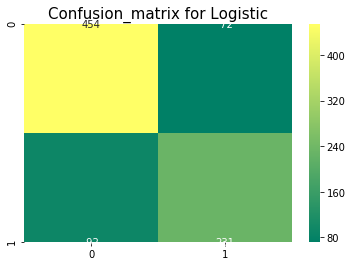

In [64]:

p = preprocessing.PolynomialFeatures(degree=2)
p_features = p.fit_transform(x)
classifier1= classifier.fit(p_features,y)
print(classifier1.score(p_features,y))
y_pred = cross_val_predict(classifier,X_train,y_train,cv=10)

q = preprocessing.PolynomialFeatures(degree=2)
q_features = q.fit_transform(test_features)
prediction = classifier1.predict(q_features) 

sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix for Logistic', y=1.05, size=15)


0.8333333333333334


Text(0.5, 1.05, 'Confusion_matrix for KNN')

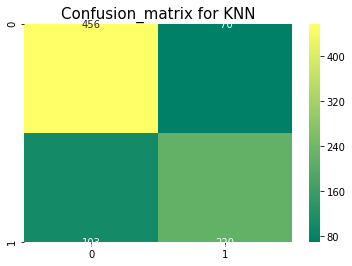

In [65]:
x=train.iloc[:,1:9]
y=train.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size = 42,random_state=0)

classifier=KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train,y_train)
y_pred = cross_val_predict(classifier,X_train,y_train,cv=10)
print(classifier.score(X_test,y_test))
prediction = classifier.predict(test)

sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix for KNN', y=1.05, size=15)


0.9523809523809523


Text(0.5, 1.05, 'Confusion_matrix for RF')

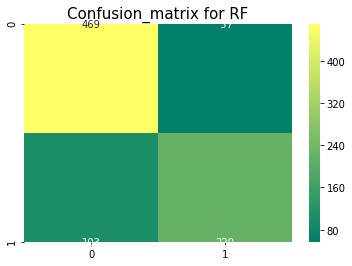

In [66]:
model = RandomForestClassifier(criterion='gini', 
                             n_estimators=30,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
model.fit(x, y)
predicted_labels = model.predict(test_features)
y_pred = cross_val_predict(model,X_train,y_train,cv=10)
print(model.score(X_test,y_test))

sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix for RF', y=1.05, size=15)


In [67]:

    q=[]
    j=0
for i in range(892,1310):
        q.append(i)
dict={'PassengerId':q,'Survived':predicted_labels}
df = pd.DataFrame(dict) 
df.to_csv(r'C:\Users\Rishabh\Documents\Titanic_Solution.csv',index=False)